# Minnesota Cost of Living

## What is the average income to expenses ratio for each economic development regions of Minnesota and how do they compare to each other? 

In [1]:
# Import Dependencies
import os
import pandas as pd 
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reading out csv files
csvpath = os.path.join(os.getcwd(), 'mn_cost_of_living_2021.csv')
csvpath2 = os.path.join(os.getcwd(), 'mn_weekly_wages_edr2021.csv')

In [3]:
#Read file and save as DataFrame
cost_of_living = pd.read_csv(csvpath)
weekly_wages = pd.read_csv(csvpath2)

### Data Clean-Up and Creation of Data Sets.

For my portion, I anticipated doing an inner merge on 2 seperate data sets, adjusting the index titles to match. Data has been merged. Ulitmately, for the income to expense ratio, it was not needed.

In [4]:
#Copy the cost of livingRename column headings to match for merge
cost_of_living2 = cost_of_living.copy()

#Rename the "Area" column to "areaname" to match other csv file
cost_of_living2 = cost_of_living2.rename(columns={"Area":"areaname"})
cost_of_living2.head()

,areaname,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
0,Aitkin County,1,1,1.0,0,51+,30874,14.84,0,341,191,570,863,249,359
1,Aitkin County,1,1,1.0,0,19-50,30471,14.65,0,353,152,570,863,253,348
2,Anoka County,1,1,1.0,0,19-50,36938,17.76,0,354,161,1066,680,389,428
3,Anoka County,1,1,1.0,0,51+,37268,17.92,0,342,199,1066,680,385,434
4,Becker County,1,1,1.0,0,19-50,28659,13.78,0,353,152,592,722,259,310


In [5]:
# Create one data set (If needed). Used inner to only show the EDRs
merged_data_df = pd.merge(cost_of_living2, weekly_wages, on="areaname", how="inner")
merged_data_df

,areaname,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,...,deaths_estabs2,deaths_estabs3,deaths_estabs4,deaths_estabsYear,deaths_employ1,deaths_employ2,deaths_employ3,deaths_employ4,deaths_employYear,Unnamed: 81
0,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,...,999999,999999,999999,999999,212,999999,999999,999999,999999,NaN
1,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,...,999999,999999,999999,999999,7,999999,999999,999999,999999,NaN
2,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,...,999999,999999,999999,999999,205,999999,999999,999999,999999,NaN
3,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,NaN
4,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17443,EDR 11 - 7 County Twin Cities,6,2,1.5,4,19-50,96036,30.78,1264,1603,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,NaN
17444,EDR 11 - 7 County Twin Cities,6,2,1.5,4,19-50,96036,30.78,1264,1603,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,NaN
17445,EDR 11 - 7 County Twin Cities,6,2,1.5,4,19-50,96036,30.78,1264,1603,...,999999,999999,999999,999999,999999,999999,999999,999999,999999,NaN
17446,EDR 11 - 7 County Twin Cities,6,2,1.5,4,19-50,96036,30.78,1264,1603,...,999999,999999,999999,999999,28,999999,999999,999999,999999,NaN


In [6]:
#Checking the types of each column
cost_of_living.dtypes

Area                   object
Family Size             int64
Number of Adults        int64
Number of Workers     float64
Number of Children      int64
Age of Adults          object
Yearly Cost             int64
Hourly Wage           float64
Child Care              int64
Food                    int64
Health Care             int64
Housing                 int64
Transport               int64
Other                   int64
Taxes                   int64
dtype: object

In [7]:
#In new Cost of Living df only keep the area's that are EDR Regions.
cost_of_living_EDR = cost_of_living[cost_of_living["Area"].str.contains("EDR")==True]
cost_of_living_EDR

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
44,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,152,622,635,268,296
45,EDR 1 - Northwest,1,1,1.0,0,51+,28332,13.62,0,345,191,622,635,265,303
46,EDR 2 - Headwaters,1,1,1.0,0,19-50,28704,13.80,0,354,152,598,716,260,312
47,EDR 2 - Headwaters,1,1,1.0,0,51+,29064,13.97,0,342,191,598,716,257,318
48,EDR 3 - Arrowhead,1,1,1.0,0,51+,29628,14.24,0,341,191,665,673,275,324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2347,EDR 10 - Southeast,6,2,2.0,4,19-50,81720,19.64,1236,1558,570,1247,873,768,558
2348,EDR 10 - Southeast,6,2,1.5,4,19-50,71784,23.01,618,1558,570,1247,873,768,348
2349,EDR 11 - 7 County Twin Cities,6,2,1.0,4,19-50,74544,35.84,0,1603,607,1894,822,958,328
2350,EDR 11 - 7 County Twin Cities,6,2,2.0,4,19-50,117192,28.17,2528,1603,607,1894,822,958,1354


#### Created data sets for each individual EDR.

In [8]:
#Combine data for each EDR into 1 data set - EDR 1 - Northwest
EDR_1_NW = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("Northwest") == True]
EDR_1_NW.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
44,EDR 1 - Northwest,1,1,1.0,0,19-50,27960,13.44,0,357,152,622,635,268,296
45,EDR 1 - Northwest,1,1,1.0,0,51+,28332,13.62,0,345,191,622,635,265,303
368,EDR 1 - Northwest,2,2,2.0,0,19-50,38964,9.37,0,654,496,631,686,352,428
369,EDR 1 - Northwest,2,2,1.5,0,51+,39720,12.73,0,632,573,631,686,346,442
370,EDR 1 - Northwest,2,2,1.5,0,19-50,38964,12.49,0,654,496,631,686,352,428


In [9]:
#Combine data for each EDR into 1 data set - EDR 2 - Headwaters
EDR_2_hw = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("Headwaters") == True]
EDR_2_hw.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
46,EDR 2 - Headwaters,1,1,1.0,0,19-50,28704,13.80,0,354,152,598,716,260,312
47,EDR 2 - Headwaters,1,1,1.0,0,51+,29064,13.97,0,342,191,598,716,257,318
375,EDR 2 - Headwaters,2,2,1.0,0,19-50,38916,18.71,0,649,496,606,778,343,371
376,EDR 2 - Headwaters,2,2,1.5,0,19-50,39804,12.76,0,649,496,606,778,343,445
377,EDR 2 - Headwaters,2,2,1.5,0,51+,40572,13.00,0,627,573,606,778,338,459


In [10]:
#Combine data for each EDR into 1 data set - EDR 3 - Arrowhead
EDR_3_aw = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("Arrowhead") == True]
EDR_3_aw.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
48,EDR 3 - Arrowhead,1,1,1.0,0,51+,29628,14.24,0,341,191,665,673,275,324
49,EDR 3 - Arrowhead,1,1,1.0,0,19-50,29268,14.07,0,353,152,665,673,279,317
382,EDR 3 - Arrowhead,2,2,2.0,0,51+,40980,9.85,0,626,573,668,730,354,464
383,EDR 3 - Arrowhead,2,1,1.0,1,19-50,48072,23.11,704,523,482,877,678,383,359
384,EDR 3 - Arrowhead,2,2,1.0,0,51+,40044,19.25,0,626,573,668,730,354,386


In [11]:
#Combine data for each EDR into 1 data set - EDR 4 - West Central
EDR_4_WC = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("West Central") == True]
EDR_4_WC.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
50,EDR 4 - West Central,1,1,1.0,0,51+,28896,13.89,0,342,191,621,677,264,313
51,EDR 4 - West Central,1,1,1.0,0,19-50,28524,13.71,0,354,152,621,677,267,306
389,EDR 4 - West Central,2,2,2.0,0,19-50,39600,9.52,0,649,496,631,734,351,439
390,EDR 4 - West Central,2,2,1.5,0,19-50,39600,12.69,0,649,496,631,734,351,439
391,EDR 4 - West Central,2,1,1.0,1,19-50,43656,20.99,526,524,482,799,681,362,264


In [12]:
#Combine data for each EDR into 1 data set - EDR 5 - North Central
EDR_5_NC = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("North Central") == True]
EDR_5_NC.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
52,EDR 5 - North Central,1,1,1.0,0,19-50,29244,14.06,0,351,152,590,762,258,324
53,EDR 5 - North Central,1,1,1.0,0,51+,29604,14.23,0,339,191,590,762,254,331
396,EDR 5 - North Central,2,2,1.0,0,51+,40284,19.37,0,622,573,601,830,335,396
397,EDR 5 - North Central,2,2,2.0,0,51+,41184,9.90,0,622,573,601,830,335,471
398,EDR 5 - North Central,2,1,1.0,1,19-50,45060,21.66,550,519,482,780,768,356,300


In [13]:
#Combine data for each EDR into 1 data set - EDR 6E - SouthWest Central
EDR_6E_SWC = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("Southwest Central") == True]
EDR_6E_SWC.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
54,EDR 6E- Southwest Central,1,1,1.0,0,51+,28764,13.83,0,342,191,597,696,257,314
55,EDR 6E- Southwest Central,1,1,1.0,0,19-50,28380,13.64,0,354,152,597,696,260,306
403,EDR 6E- Southwest Central,2,1,1.0,1,19-50,44016,21.16,561,524,482,769,701,354,277
404,EDR 6E- Southwest Central,2,2,1.0,0,19-50,38544,18.53,0,649,496,604,755,343,365
405,EDR 6E- Southwest Central,2,2,2.0,0,51+,40164,9.65,0,627,573,604,755,337,451


In [14]:
#Combine data for each EDR into 1 data set - EDR 6W - Upper MN Valley
EDR_6W_umnv = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("Upper Minnesota Valley") == True]
EDR_6W_umnv.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
56,EDR 6W- Upper Minnesota Valley,1,1,1.0,0,51+,27936,13.43,0,350,191,571,664,252,300
57,EDR 6W- Upper Minnesota Valley,1,1,1.0,0,19-50,27588,13.26,0,362,152,571,664,256,294
410,EDR 6W- Upper Minnesota Valley,2,2,2.0,0,51+,39444,9.48,0,642,573,579,719,334,440
411,EDR 6W- Upper Minnesota Valley,2,2,2.0,0,19-50,38664,9.29,0,664,496,579,719,340,424
412,EDR 6W- Upper Minnesota Valley,2,2,1.0,0,51+,38580,18.55,0,642,573,579,719,334,368


In [15]:
#Combine data for each EDR into 1 data set - EDR 7E - East Central
EDR_7E_C = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("East Central") == True]
EDR_7E_C.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
58,EDR 7E- East Central,1,1,1.0,0,19-50,35868,17.24,0,349,157,892,824,340,427
59,EDR 7E- East Central,1,1,1.0,0,51+,36228,17.42,0,338,196,892,824,336,433
417,EDR 7E- East Central,2,2,2.0,0,51+,47412,11.40,0,619,530,908,899,418,577
418,EDR 7E- East Central,2,2,1.5,0,51+,47412,15.20,0,619,530,908,899,418,577
419,EDR 7E- East Central,2,2,2.0,0,19-50,46656,11.22,0,641,453,908,899,424,563


In [16]:
#Combine data for each EDR into 1 data set - EDR 7W - Central
EDR_7W_C = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("7W") == True]
EDR_7W_C.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
60,EDR 7W- Central,1,1,1.0,0,19-50,33960,16.33,0,350,157,889,707,339,388
61,EDR 7W- Central,1,1,1.0,0,51+,34308,16.49,0,338,195,889,707,336,394
424,EDR 7W- Central,2,2,2.0,0,19-50,44532,10.70,0,641,455,903,768,423,521
425,EDR 7W- Central,2,1,1.0,1,19-50,55032,26.46,863,517,441,1115,712,447,491
426,EDR 7W- Central,2,2,1.0,0,19-50,43452,20.89,0,641,455,903,768,423,431


In [17]:
#Combine data for each EDR into 1 data set - EDR 8 - Southwest
EDR_8_SW = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("8") == True]
EDR_8_SW.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
62,EDR 8 - Southwest,1,1,1.0,0,19-50,27180,13.07,0,359,152,585,627,258,284
63,EDR 8 - Southwest,1,1,1.0,0,51+,27564,13.25,0,347,191,585,627,255,292
431,EDR 8 - Southwest,2,2,1.5,0,19-50,38208,12.25,0,657,496,595,678,343,415
432,EDR 8 - Southwest,2,2,2.0,0,51+,38964,9.37,0,635,573,595,678,337,429
433,EDR 8 - Southwest,2,1,1.0,1,19-50,40896,19.66,457,530,482,756,631,352,200


In [18]:
#Combine data for each EDR into 1 data set - EDR 9 _ South Central
EDR_9_Sc = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("South Central") == True]
EDR_9_Sc.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
64,EDR 9 - South Central,1,1,1.0,0,51+,29196,14.04,0,343,191,676,630,279,314
65,EDR 9 - South Central,1,1,1.0,0,19-50,28824,13.86,0,355,152,676,630,282,307
438,EDR 9 - South Central,2,1,1.0,1,19-50,44172,21.24,497,525,482,888,634,387,268
439,EDR 9 - South Central,2,2,1.0,0,51+,39660,19.07,0,628,573,686,681,360,377
440,EDR 9 - South Central,2,2,1.5,0,19-50,39840,12.77,0,650,496,686,681,366,441


In [19]:
#Combine data for each EDR into 1 data set - EDR 910 - Southesat
EDR_10_SE = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("Southeast") == True]
EDR_10_SE.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
66,EDR 10 - Southeast,1,1,1.0,0,51+,30072,14.46,0,342,191,685,676,281,331
67,EDR 10 - Southeast,1,1,1.0,0,19-50,29724,14.29,0,354,152,685,676,285,325
445,EDR 10 - Southeast,2,2,1.5,0,19-50,40812,13.08,0,649,496,696,732,368,460
446,EDR 10 - Southeast,2,1,1.0,1,19-50,48816,23.47,729,524,482,895,680,388,370
447,EDR 10 - Southeast,2,2,1.0,0,51+,40608,19.52,0,627,573,696,732,362,394


In [20]:
#Combine data for each EDR into 1 data set - EDR 11 - 7 County Twin Cities
EDR_11_TC = cost_of_living_EDR[cost_of_living_EDR["Area"].str.contains("7 County Twin Cities") == True]
EDR_11_TC.head()

,Area,Family Size,Number of Adults,Number of Workers,Number of Children,Age of Adults,Yearly Cost,Hourly Wage,Child Care,Food,Health Care,Housing,Transport,Other,Taxes
68,EDR 11 - 7 County Twin Cities,1,1,1.0,0,51+,36864,17.72,0,352,199,1066,640,388,427
69,EDR 11 - 7 County Twin Cities,1,1,1.0,0,19-50,36540,17.57,0,364,161,1066,640,392,422
452,EDR 11 - 7 County Twin Cities,2,2,1.0,0,19-50,45648,21.95,0,668,420,1086,693,480,457
453,EDR 11 - 7 County Twin Cities,2,2,1.0,0,51+,46416,22.32,0,646,497,1086,693,474,472
454,EDR 11 - 7 County Twin Cities,2,2,2.0,0,51+,47580,11.44,0,646,497,1086,693,474,569


In [21]:
#Average Expenses for EDR 11 (Twin Cities), full average (not dependent on household size)
EDR_11_TC_mean_expenses = EDR_11_TC["Yearly Cost"].mean()
EDR_11_TC_mean_expenses

73917.5

#### Average Data

Average Minnesota household size is a 3 member household. Calculated the averages for Yearly Cost (expenses), Hourly Wages, Housing Cost, Income Expense Ratios (expenses/annual wage for both 1 full time worker and 2 full time workers) for each EDR.

In [22]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_1_NW[EDR_1_NW["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_1_NW[EDR_1_NW["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_1_NW[EDR_1_NW["Family Size"]==3]["Housing"].mean()
aw = EDR_1_NW[EDR_1_NW["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_1_NW[EDR_1_NW["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2 
EDR_1_NW_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_1_NW_mean_expenses3.insert(0,"Area", EDR_1_NW["Area"][44])
EDR_1_NW_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 1 - Northwest,48591.0,18.4975,881.75,38474.8,76949.6,1.262931,0.631465


In [23]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_2_hw[EDR_2_hw["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_2_hw[EDR_2_hw["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_2_hw[EDR_2_hw["Family Size"]==3]["Housing"].mean()
aw = EDR_2_hw[EDR_2_hw["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_2_hw[EDR_2_hw["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2 
EDR_2_hw_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_2_hw_mean_expenses3.insert(0,"Area", EDR_2_hw["Area"][46])
EDR_2_hw_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 2 - Headwaters,51054.0,19.385,854.5,40320.8,80641.6,1.266195,0.633098


In [24]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_3_aw[EDR_3_aw["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_3_aw[EDR_3_aw["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_3_aw[EDR_3_aw["Family Size"]==3]["Housing"].mean()
aw = EDR_3_aw[EDR_3_aw["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_3_aw[EDR_3_aw["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2
EDR_3_aw_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_3_aw_mean_expenses3.insert(0,"Area", EDR_3_aw["Area"][48])
EDR_3_aw_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 3 - Arrowhead,54321.0,20.6625,940.75,42978.0,85956.0,1.263926,0.631963


In [25]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_4_WC[EDR_4_WC["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_4_WC[EDR_4_WC["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_4_WC[EDR_4_WC["Family Size"]==3]["Housing"].mean()
aw = EDR_4_WC[EDR_4_WC["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_4_WC[EDR_4_WC["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw
ier2 = yc / aw2 
EDR_4_WC_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_4_WC_mean_expenses3.insert(0,"Area", EDR_4_WC["Area"][50])
EDR_4_WC_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 4 - West Central,50355.0,19.145,872.75,39821.6,79643.2,1.264515,0.632257


In [26]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_5_NC[EDR_5_NC["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_5_NC[EDR_5_NC["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_5_NC[EDR_5_NC["Family Size"]==3]["Housing"].mean()
aw = EDR_5_NC[EDR_5_NC["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_5_NC[EDR_5_NC["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2 
EDR_5_NC_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_5_NC_mean_expenses3.insert(0,"Area", EDR_5_NC["Area"][52])
EDR_5_NC_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 5 - North Central,51675.0,19.615,838.5,40799.2,81598.4,1.266569,0.633284


In [27]:
#Calculated Average Expenses, and put into dataframe
c= EDR_6E_SWC[EDR_6E_SWC["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_6E_SWC[EDR_6E_SWC["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_6E_SWC[EDR_6E_SWC["Family Size"]==3]["Housing"].mean()
aw = EDR_6E_SWC[EDR_6E_SWC["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_6E_SWC[EDR_6E_SWC["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw
ier2 = yc / aw2 
EDR_6E_SWC_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_6E_SWC_mean_expenses3.insert(0,"Area", EDR_6E_SWC["Area"][54])
EDR_6E_SWC_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 6E- Southwest Central,51675.0,19.305,844.75,40154.4,80308.8,1.286908,0.643454


In [28]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_6W_umnv[EDR_6W_umnv["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_6W_umnv[EDR_6W_umnv["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_6W_umnv[EDR_6W_umnv["Family Size"]==3]["Housing"].mean()
aw = EDR_6W_umnv[EDR_6W_umnv["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_6W_umnv[EDR_6W_umnv["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2
EDR_6W_umnv_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_6W_umnv_mean_expenses3.insert(0,"Area", EDR_6W_umnv["Area"][56])
EDR_6W_umnv_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 6W- Upper Minnesota Valley,48342.0,18.39,822.5,38251.2,76502.4,1.263803,0.631902


In [29]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_7E_C[EDR_7E_C["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_7E_C[EDR_7E_C["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_7E_C[EDR_7E_C["Family Size"]==3]["Housing"].mean()
aw = EDR_7E_C[EDR_7E_C["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_7E_C[EDR_7E_C["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw
ier2 = yc / aw2
EDR_7E_C_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_7E_C_mean_expenses3.insert(0,"Area", EDR_7E_C["Area"][58])
EDR_7E_C_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 7E- East Central,66591.0,25.3875,1260.0,52806.0,105612.0,1.26105,0.630525


In [30]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_7W_C[EDR_7W_C["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_7W_C[EDR_7W_C["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_7W_C[EDR_7W_C["Family Size"]==3]["Housing"].mean()
aw = EDR_7W_C[EDR_7W_C["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 =  EDR_7W_C[ EDR_7W_C["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2
EDR_7W_C_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_7W_C_mean_expenses3.insert(0,"Area", EDR_7W_C["Area"][60])
EDR_7W_C_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 7W- Central,63357.0,24.245,1228.5,50429.6,100859.2,1.256345,0.628173


In [31]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_8_SW[EDR_8_SW["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_8_SW[EDR_8_SW["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_8_SW[EDR_8_SW["Family Size"]==3]["Housing"].mean()
aw = EDR_8_SW[EDR_8_SW["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_8_SW[EDR_8_SW["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2
EDR_8_SW_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_8_SW_mean_expenses3.insert(0,"Area", EDR_8_SW["Area"][62])
EDR_8_SW_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 8 - Southwest,47772.0,18.1725,821.25,37798.8,75597.6,1.26385,0.631925


In [32]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_9_Sc[EDR_9_Sc["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_9_Sc[EDR_9_Sc["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_9_Sc[EDR_9_Sc["Family Size"]==3]["Housing"].mean()
aw = EDR_9_Sc[EDR_9_Sc["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_9_Sc[EDR_9_Sc["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw
ier2 = yc / aw2
EDR_9_Sc_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_9_Sc_mean_expenses3.insert(0,"Area", EDR_9_Sc["Area"][64])
EDR_9_Sc_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 9 - South Central,51150.0,19.475,971.5,40508.0,81016.0,1.262714,0.631357


In [33]:
#Calculated Average Expenses, and put into dataframe
yc= EDR_10_SE[EDR_10_SE["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_10_SE[EDR_10_SE["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_10_SE[EDR_10_SE["Family Size"]==3]["Housing"].mean()
aw = EDR_10_SE[EDR_10_SE["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_10_SE[EDR_10_SE["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw
ier2 = yc / aw2 
EDR_10_SE_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_10_SE_mean_expenses3.insert(0,"Area", EDR_10_SE["Area"][66])
EDR_10_SE_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 10 - Southeast,55437.0,21.125,983.0,43940.0,87880.0,1.261652,0.630826


In [34]:
#Calculated Average Expenses, and put into dataframe
yc = EDR_11_TC[EDR_11_TC["Family Size"]==3]["Yearly Cost"].mean()
hw = EDR_11_TC[EDR_11_TC["Family Size"]==3]["Hourly Wage"].mean()
h = EDR_11_TC[EDR_11_TC["Family Size"]==3]["Housing"].mean()
aw = EDR_11_TC[EDR_11_TC["Family Size"]==3]["Hourly Wage"].mean() *2080
aw2 = EDR_11_TC[EDR_11_TC["Family Size"]==3]["Hourly Wage"].mean() *2080 * 2
ier1 = yc / aw 
ier2 = yc / aw2 
EDR_11_TC_mean_expenses3 = pd.DataFrame({"Yearly Cost": yc,
                                        "Hourly Wage": hw, 
                                        "Housing": h, 
                                        "Annual Wage": aw,
                                        "Annual Wage (2FT)": aw2,
                                        "Income Expense Ratio": ier1,
                                        "Income Expense Ratio (2FT)": ier2}, index=[0])
EDR_11_TC_mean_expenses3.insert(0,"Area", EDR_11_TC["Area"][68])
EDR_11_TC_mean_expenses3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 11 - 7 County Twin Cities,76563.0,29.27,1484.5,60881.6,121763.2,1.257572,0.628786


#### Combined data frame with 3 member households for Minnesota EDRs.

In [35]:
#Created new data frame with all of the household size of 3 average information. 
frames = [EDR_1_NW_mean_expenses3, EDR_2_hw_mean_expenses3, EDR_3_aw_mean_expenses3, EDR_4_WC_mean_expenses3, EDR_5_NC_mean_expenses3, EDR_6E_SWC_mean_expenses3, EDR_6W_umnv_mean_expenses3, EDR_7E_C_mean_expenses3, EDR_7W_C_mean_expenses3, EDR_8_SW_mean_expenses3, EDR_9_Sc_mean_expenses3, EDR_10_SE_mean_expenses3, EDR_11_TC_mean_expenses3]
EDR_yearly_expenses_3 = pd.concat(frames,ignore_index=True)
EDR_yearly_expenses_3

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 1 - Northwest,48591.0,18.4975,881.75,38474.8,76949.6,1.262931,0.631465
1,EDR 2 - Headwaters,51054.0,19.3850,854.50,40320.8,80641.6,1.266195,0.633098
2,EDR 3 - Arrowhead,54321.0,20.6625,940.75,42978.0,85956.0,1.263926,0.631963
3,EDR 4 - West Central,50355.0,19.1450,872.75,39821.6,79643.2,1.264515,0.632257
4,EDR 5 - North Central,51675.0,19.6150,838.50,40799.2,81598.4,1.266569,0.633284
5,EDR 6E- Southwest Central,51675.0,19.3050,844.75,40154.4,80308.8,1.286908,0.643454
6,EDR 6W- Upper Minnesota Valley,48342.0,18.3900,822.50,38251.2,76502.4,1.263803,0.631902
7,EDR 7E- East Central,66591.0,25.3875,1260.00,52806.0,105612.0,1.261050,0.630525
8,EDR 7W- Central,63357.0,24.2450,1228.50,50429.6,100859.2,1.256345,0.628173
9,EDR 8 - Southwest,47772.0,18.1725,821.25,37798.8,75597.6,1.263850,0.631925


Averages across the State of Minnesota

In [36]:
EDR_yearly_expenses_3["Yearly Cost"].mean()

55144.846153846156

In [37]:
EDR_yearly_expenses_3["Yearly Cost"].mean()

55144.846153846156

When looking at the averages across the State, the average hourly wage is $20.98; out of the 13 EDR's 4 EDR's make above the average.

In [38]:
EDR_yearly_expenses_3["Housing"].mean()

984.9423076923077

In [39]:
EDR_yearly_expenses_3["Annual Wage"].mean()

43628.0

In [40]:
EDR_yearly_expenses_3["Annual Wage (2FT)"].mean()

87256.0

In [41]:
EDR_yearly_expenses_3["Income Expense Ratio"].mean()

1.2644637670356038

In [42]:
EDR_yearly_expenses_3["Income Expense Ratio (2FT)"].mean()

0.6322318835178019

In [43]:
#Create a duplicate dataframe for display purposes with formating.
EDR_Expense_Display = EDR_yearly_expenses_3.copy()
EDR_Expense_Display["Yearly Cost"] = EDR_Expense_Display["Yearly Cost"].map("${:.2f}".format)
EDR_Expense_Display["Hourly Wage"] = EDR_Expense_Display["Hourly Wage"].map("${:.2f}".format)
EDR_Expense_Display["Housing"] = EDR_Expense_Display["Housing"].map("${:.2f}".format)
EDR_Expense_Display["Annual Wage"] = EDR_Expense_Display["Annual Wage"].map("${:.2f}".format)
EDR_Expense_Display["Annual Wage (2FT)"] = EDR_Expense_Display["Annual Wage (2FT)"].map("${:.2f}".format)
EDR_Expense_Display["Income Expense Ratio"] = EDR_Expense_Display["Income Expense Ratio"].map("{:.3%}".format)
EDR_Expense_Display["Income Expense Ratio (2FT)"] = EDR_Expense_Display["Income Expense Ratio (2FT)"].map("{:.3%}".format)
EDR_Expense_Display

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 1 - Northwest,$48591.00,$18.50,$881.75,$38474.80,$76949.60,126.293%,63.147%
1,EDR 2 - Headwaters,$51054.00,$19.38,$854.50,$40320.80,$80641.60,126.620%,63.310%
2,EDR 3 - Arrowhead,$54321.00,$20.66,$940.75,$42978.00,$85956.00,126.393%,63.196%
3,EDR 4 - West Central,$50355.00,$19.14,$872.75,$39821.60,$79643.20,126.451%,63.226%
4,EDR 5 - North Central,$51675.00,$19.61,$838.50,$40799.20,$81598.40,126.657%,63.328%
5,EDR 6E- Southwest Central,$51675.00,$19.30,$844.75,$40154.40,$80308.80,128.691%,64.345%
6,EDR 6W- Upper Minnesota Valley,$48342.00,$18.39,$822.50,$38251.20,$76502.40,126.380%,63.190%
7,EDR 7E- East Central,$66591.00,$25.39,$1260.00,$52806.00,$105612.00,126.105%,63.052%
8,EDR 7W- Central,$63357.00,$24.24,$1228.50,$50429.60,$100859.20,125.635%,62.817%
9,EDR 8 - Southwest,$47772.00,$18.17,$821.25,$37798.80,$75597.60,126.385%,63.192%


### Comparisson Graphs - Analysis

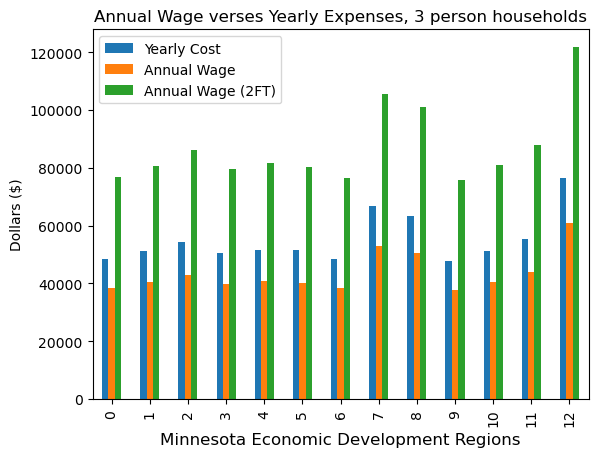

<Figure size 1200x800 with 0 Axes>

In [45]:
# Yearly Cost Comparisson and Annual Wage for EDRs
cost = EDR_yearly_expenses_3.filter(items=['Area', 'Yearly Cost','Annual Wage', 'Annual Wage (2FT)'])
cost

cost_comp = cost.plot(kind='bar')
cost_comp
cost_comp.set_ylabel("Dollars ($)")
cost_comp.set_title("Annual Wage verses Yearly Expenses, 3 person households")
plt.xlabel(("Minnesota Economic Development Regions"), size = 12)
plt.figure(figsize=(12,8))
plt.savefig("wage_v_expense.png")
plt.show()


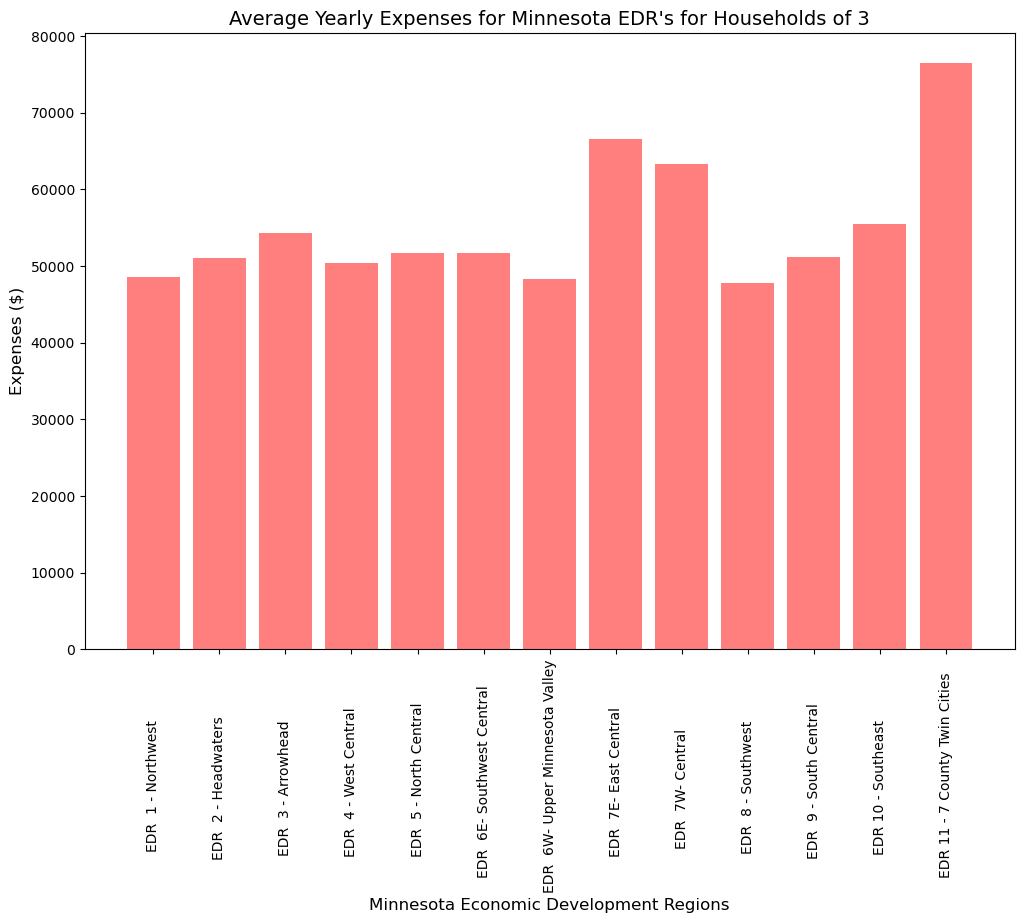

In [46]:
# Create Bar graph to show Yearly Cost over all EDR 
x_axis = np.arange(len(EDR_yearly_expenses_3))
tick_locations = [value+0.4 for value in x_axis] 
plt.figure(figsize = (12,8))
plt.bar(x_axis, EDR_yearly_expenses_3["Yearly Cost"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, EDR_yearly_expenses_3["Area"], rotation="vertical")
plt.title(("Average Yearly Expenses for Minnesota EDR's for Households of 3"), size = 14)
plt.ylabel(("Expenses ($)"), size = 12)
plt.xlabel(("Minnesota Economic Development Regions"), size = 12)
plt.savefig("yearly_expense.png")
plt.show()

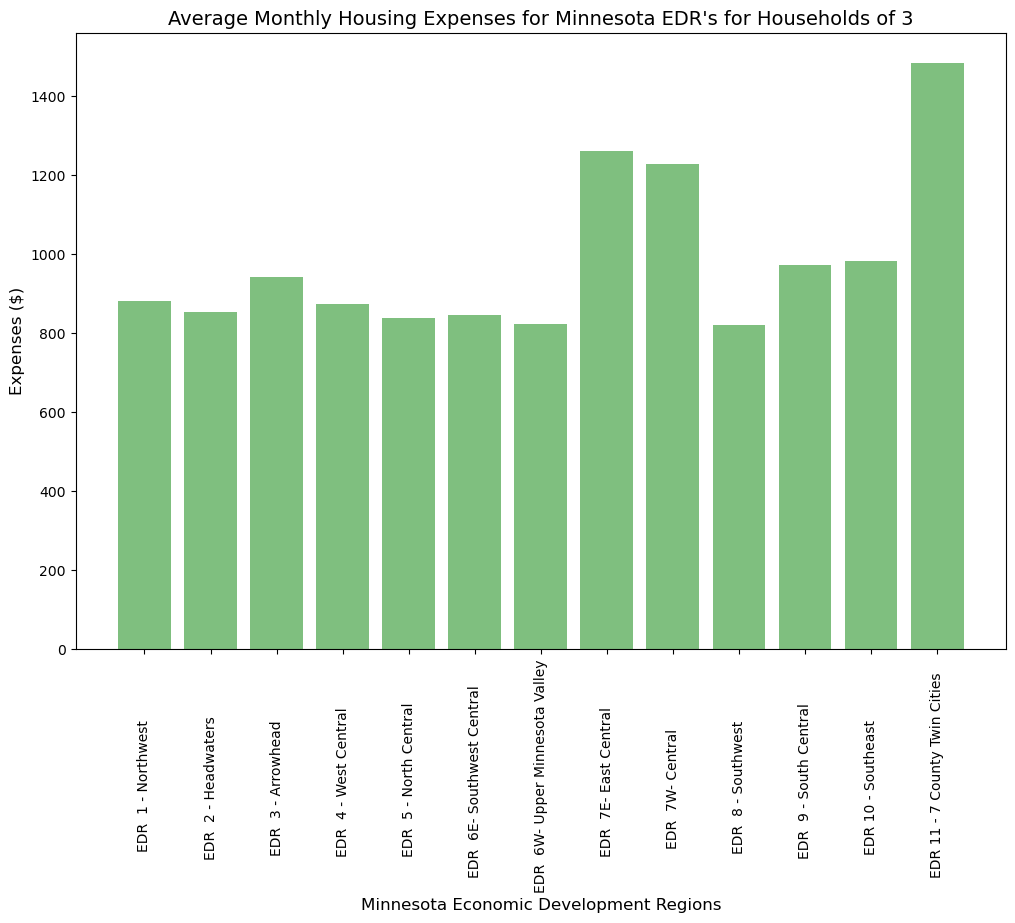

In [47]:
# Create Bar graph to show Average Housing Cost over all EDR 
x_axis = np.arange(len(EDR_yearly_expenses_3))
tick_locations = [value+0.4 for value in x_axis] 
plt.figure(figsize = (12,8))
plt.bar(x_axis, EDR_yearly_expenses_3["Housing"], color='g', alpha=0.5, align="edge")
plt.xticks(tick_locations, EDR_yearly_expenses_3["Area"], rotation="vertical")
plt.title(("Average Monthly Housing Expenses for Minnesota EDR's for Households of 3"), size = 14)
plt.ylabel(("Expenses ($)"), size = 12)
plt.xlabel(("Minnesota Economic Development Regions"), size = 12),
plt.savefig("monthly_housing.png")
plt.show()

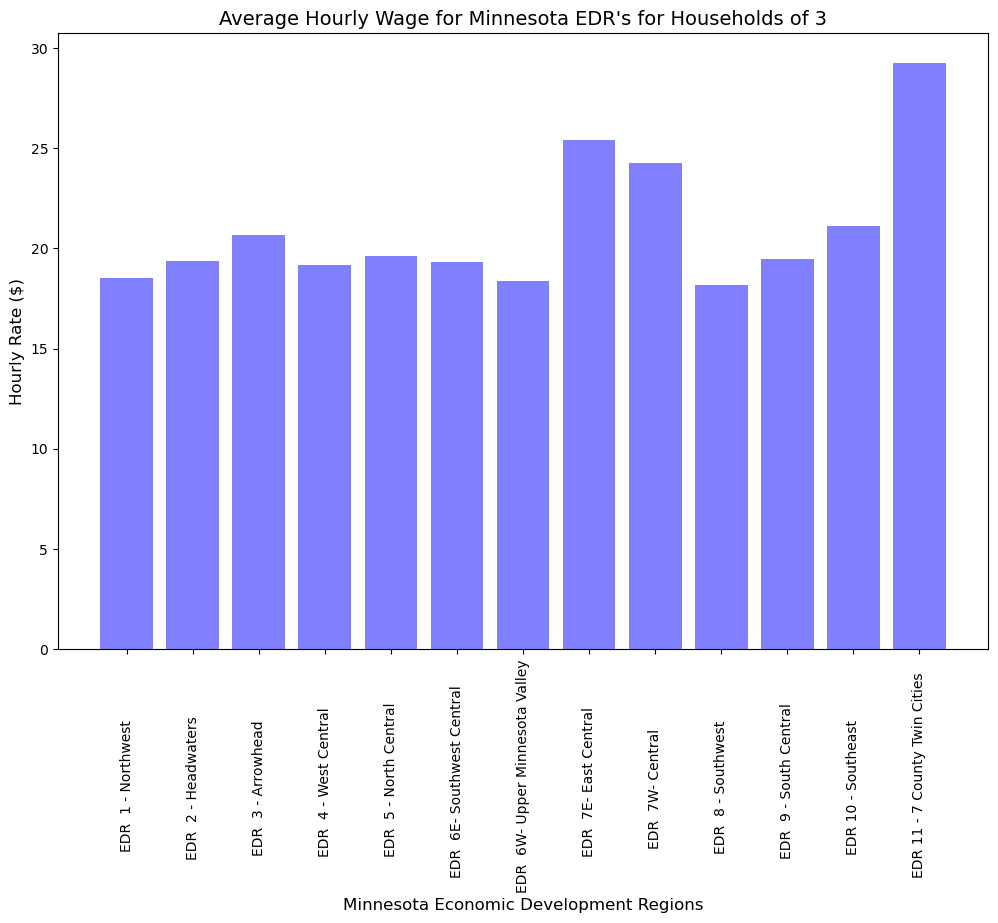

In [48]:
# Create Bar graph to show Average Hourly Wage for all EDRs
x_axis = np.arange(len(EDR_yearly_expenses_3))
tick_locations = [value+0.4 for value in x_axis] 
plt.figure(figsize = (12,8))
plt.bar(x_axis, EDR_yearly_expenses_3["Hourly Wage"], color='b', alpha=0.5, align="edge")
plt.xticks(tick_locations, EDR_yearly_expenses_3["Area"], rotation="vertical")
plt.title(("Average Hourly Wage for Minnesota EDR's for Households of 3"), size = 14)
plt.ylabel(("Hourly Rate ($)"), size = 12)
plt.xlabel(("Minnesota Economic Development Regions"), size = 12)
plt.savefig("hourly_wage.png")
plt.show()

When looking at these graphs, they all follow a very similar pattern on the graph. The Twin Cities has the highest yearly expenses $76,560 compared to $47,772 for the Southwest EDR. For the average monthly housing expenses, the Southwest had the lowest cost, compared to the Twin Cities with the highest cost. Not surprizing the Twin Cities employees had the highest hourly wage rate at $29.27; with the Southwest Region having an hourly rate of $18.17.  East Central and Central EDR Regions were the closest EDR to matching the Twin Cities.

In [49]:
#Look at the top 3 EDRs with highest wages, and/or largest expenses.
frames = [ EDR_7E_C_mean_expenses3, EDR_7W_C_mean_expenses3, EDR_11_TC_mean_expenses3]
EDR_yearly_expenses_top = pd.concat(frames,ignore_index=True)
EDR_yearly_expenses_top

,Area,Yearly Cost,Hourly Wage,Housing,Annual Wage,Annual Wage (2FT),Income Expense Ratio,Income Expense Ratio (2FT)
0,EDR 7E- East Central,66591.0,25.3875,1260.0,52806.0,105612.0,1.261050,0.630525
1,EDR 7W- Central,63357.0,24.2450,1228.5,50429.6,100859.2,1.256345,0.628173
2,EDR 11 - 7 County Twin Cities,76563.0,29.2700,1484.5,60881.6,121763.2,1.257572,0.628786


Income Expense Ratio = Expenses / Annual Wage

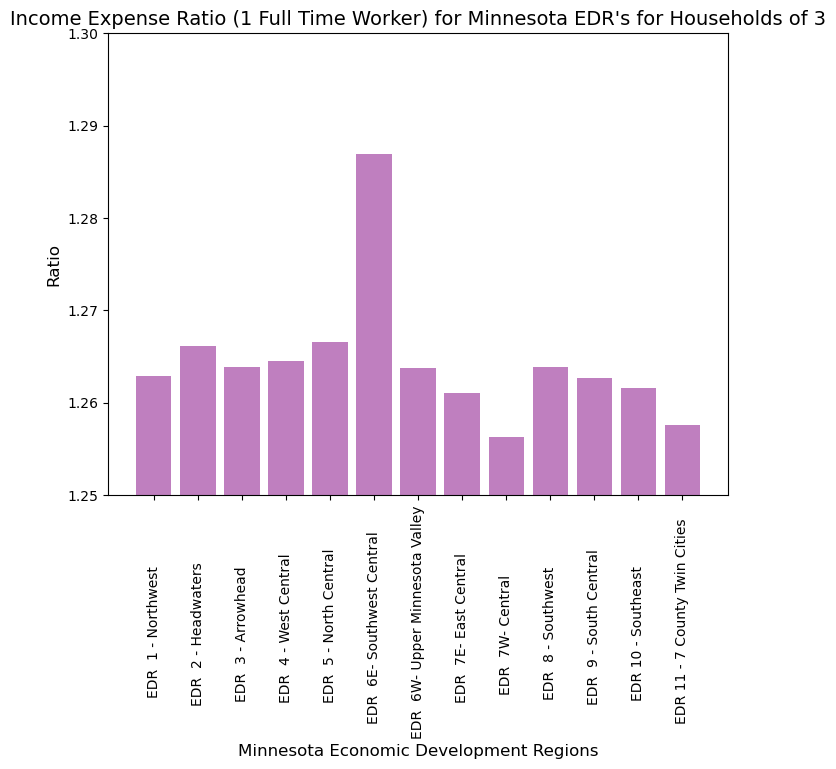

In [50]:
# Show the income expense rations
x_axis = np.arange(len(EDR_yearly_expenses_3))
tick_locations = [value+0.4 for value in x_axis] 
plt.figure(figsize = (8,6))
plt.bar(x_axis, EDR_yearly_expenses_3["Income Expense Ratio"], color='purple', alpha=0.5, align="edge")
plt.xticks(tick_locations, EDR_yearly_expenses_3["Area"], rotation="vertical")
plt.title(("Income Expense Ratio (1 Full Time Worker) for Minnesota EDR's for Households of 3"), size = 14)
plt.ylabel(("Ratio"), size = 12)
plt.xlabel(("Minnesota Economic Development Regions"), size = 12)
plt.ylim(1.25,1.30)
plt.savefig("inc_exp_ratio1.png")
plt.show()

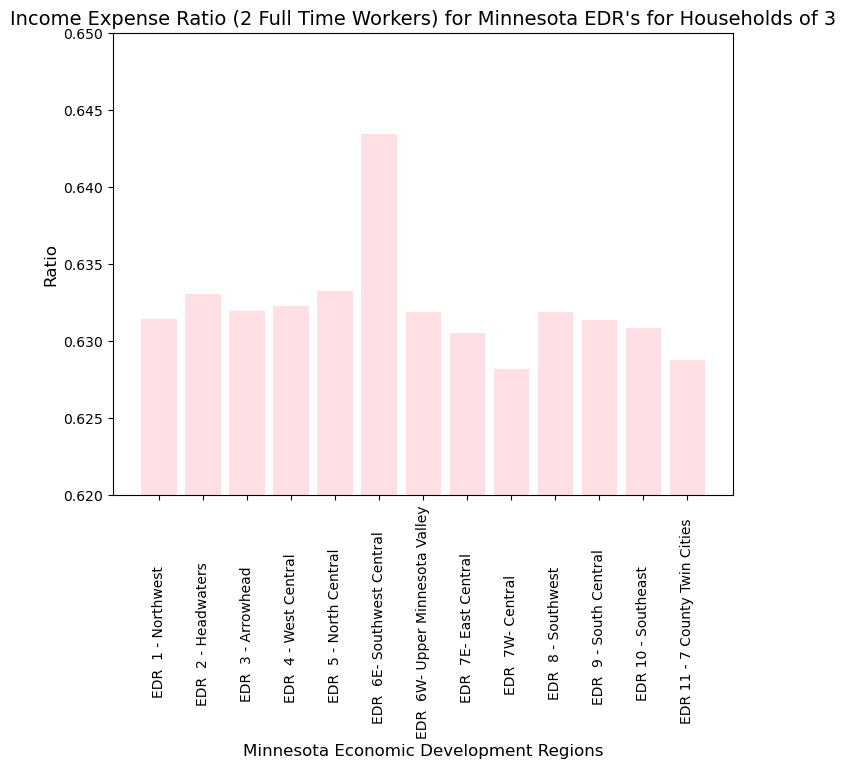

In [52]:
# Show the income expense rations
x_axis = np.arange(len(EDR_yearly_expenses_3))
tick_locations = [value+0.4 for value in x_axis] 
plt.figure(figsize = (8,6))
plt.bar(x_axis, EDR_yearly_expenses_3["Income Expense Ratio (2FT)"], color='pink', alpha=0.5, align="edge")
plt.xticks(tick_locations, EDR_yearly_expenses_3["Area"], rotation="vertical")
plt.title(("Income Expense Ratio (2 Full Time Workers) for Minnesota EDR's for Households of 3"), size = 14)
plt.ylabel(("Ratio"), size = 12)
plt.ylim(.62, .65)
plt.xlabel(("Minnesota Economic Development Regions"), size = 12)
plt.savefig("inc_exp_ratio2.png")
plt.show()

EDR 7W - Central has the best income to expense ratio (the smallest number), followed closely by the EDR 11 - Twin Cities.  EDR 6E Southwest Central families have the smallest gap between their annual wages and the expenses that they have. 
For those in a dual income household they will be able to potential save money throughout the year; where as on average a single household worker spends more than their annual salary.

## Conclusions

##### What is the average income to expenses ratio for each economic development regions of Minnesota and how do they compare to each other? 

Despite varying hourly wages, housing expenses and cost of living costs; there is no difference in portions throughout the state of Minnesota. Cost of Living is proportionate across all of the EDRs. The lower the annual expenses, the lower annual wage, and the higher the income to expense ratio is. 